In [4]:
#Linear Discriminant Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
# Use the URL method if reading from GitHub, otherwise use the local filename
url = "https://raw.githubusercontent.com/akay6483/mmml-ecommerce/refs/heads/main/dataset/online_shoppers_intention.csv"
df = pd.read_csv(url)

# Display basic info
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
# 1. Encode Categorical Variables
# Identify categorical columns
categorical_cols = ['Month', 'VisitorType', 'Weekend', 'Revenue']

# Create a copy for LDA
df_lda = df.copy()

# Apply Label Encoding
le_dict = {} # Store encoders if we need to inverse transform later
for col in categorical_cols:
    le = LabelEncoder()
    df_lda[col] = le.fit_transform(df_lda[col])
    le_dict[col] = le

# 2. Separate Features and Target
# Target is 'Revenue' (the class we want to separate)
X = df_lda.drop('Revenue', axis=1)
y = df_lda['Revenue']

# 3. Standardize the Features
# LDA maximizes the separation between classes relative to variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Preprocessing complete. Features scaled.")

Preprocessing complete. Features scaled.


In [6]:
# Initialize LDA
# n_components is min(n_features, n_classes - 1). Here min(17, 2-1) = 1.
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit and Transform
# Note: LDA is supervised, so we pass 'y' to fit_transform
X_lda = lda.fit_transform(X_scaled, y)

print(f"LDA Explained Variance Ratio: {lda.explained_variance_ratio_}")

LDA Explained Variance Ratio: [1.]


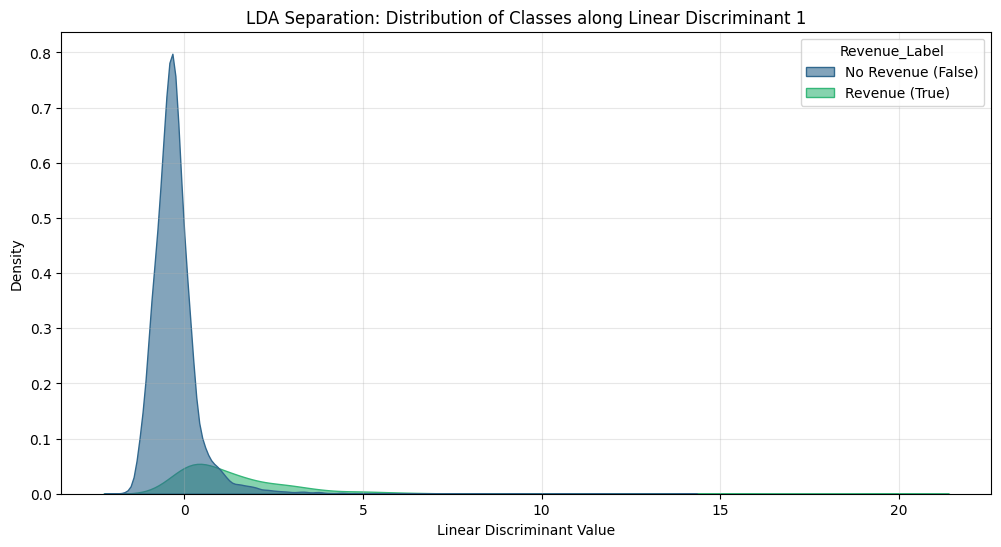

In [7]:
plt.figure(figsize=(12, 6))

# Create a temporary dataframe for plotting
plot_df = pd.DataFrame(data=X_lda, columns=['LDA_Component_1'])
plot_df['Revenue'] = y
plot_df['Revenue_Label'] = plot_df['Revenue'].map({0: 'No Revenue (False)', 1: 'Revenue (True)'})

# Plot Density (KDE)
sns.kdeplot(
    data=plot_df,
    x='LDA_Component_1',
    hue='Revenue_Label',
    fill=True,
    palette='viridis',
    alpha=0.6
)

plt.title('LDA Separation: Distribution of Classes along Linear Discriminant 1')
plt.xlabel('Linear Discriminant Value')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

LDA Classification Report:
              precision    recall  f1-score   support

  No Revenue       0.89      0.98      0.93     10422
     Revenue       0.75      0.33      0.46      1908

    accuracy                           0.88     12330
   macro avg       0.82      0.66      0.70     12330
weighted avg       0.87      0.88      0.86     12330


Confusion Matrix:


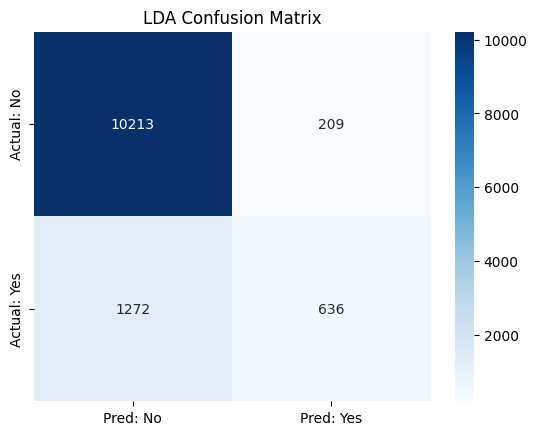

In [8]:
# Predict classes using the LDA model
y_pred = lda.predict(X_scaled)

# Evaluate performance
print("LDA Classification Report:")
print(classification_report(y, y_pred, target_names=['No Revenue', 'Revenue']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: No', 'Pred: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('LDA Confusion Matrix')
plt.show()

Comments: